# 最尤推定法

## サンプルデータ

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

In [2]:
N = 10 # サンプルを取得する位置 x の個数
M = [0, 1, 3, 9] # 多項式の次数

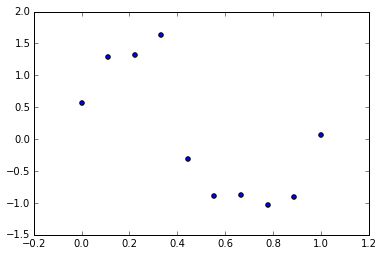

In [3]:
# データセット {x_n,y_n} (n = 1...N)を準備
def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i) / float(num - 1)
        y = np.sin(2 * np.pi * x) + normal(scale=0.3)
        dataset = dataset.append(Series([x, y], index=['x', 'y']),
                                 ignore_index=True)
    return dataset

set = create_dataset(N)
plt.scatter(set.x, set.y)

## 確率モデルの利用

### 「データ発生確率」の設定

パラメトリックモデルの3ステップの第一ステップ、パラメーターを含むモデル(数式)を設定する。

「このデータの背後には、$M$次多項式の関係があり、さらに標準偏差$\sigma^2$の誤差が含まれている」と仮定する。

まず、特徴変数$x$と目的変数$t$の間には以下のような$M$次多項式の関係があるものとする。

$$
\begin{align*}
f(x) &= w_0 + w_1x + w_2x^2 + \cdots + w_Mx^M \\
&= \sum_{m=0}^Mw_mx_m \tag{3.1}
\end{align*}
$$

そのうえで「観測点$x_n$における観測値$t$は、$f(x_n)$を中心として、およそ$f(x_n) \pm \sigma$の範囲に散らばる」と考える。ここで誤差として正規分布を採用する。

以上から今回のモデルは、観測点$x_n$における観測値$t$の確率を表す次の数式となる。

$$
N\left(t \mid f(x_n), \sigma^2\right) = \frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e}^{-\frac{1}{2 \sigma^2} \left\{ t - f(x_n) \right\}^2} \tag{3.5}
$$

$$
f(x) = \sum_{m=0}^Mw_mx^m \tag{3.6}
$$

ここでこのモデルのパラメーターは(3.6)の係数$\left\{w_m\right\}_{m=0}^M$と(3.5)の標準偏差$\sigma$である。

### 尤度関数によるパラメーターの評価

パラメトリックモデルの3つのステップの第2ステップ、パラメーターを評価する基準を定める。

トレーニングセットに含まれるデータ$\left\{ x_n, t_n \right\}_{n=1}^N$の得られる確率$P$を以下の通り表す。

$$
\begin{align*}
P &= N(t_1 \mid f(x_1), \sigma^2)\times \cdots \times N(t_N \mid f(x_N), \sigma^2) \\
  &= \prod_{n=1}^N N(t_n \mid f(x_n), \sigma^2) \tag{3.8}
\end{align*}
$$

ここで$N$はある特定の観測点$x_n$で$t_n$が得られる確率で、以下式で表せる

$$
N(t_n \mid f(x_n), \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e} ^ {\left\{ - \frac{1}{2 \sigma^2} t_n - f(x_n) \right\}^2} \tag{3.7}
$$

(3.8)はパラメーター$\left\{ x_n, t_n \right\}_{n=1}^N$の関数であり、「トレーニングセットのデータが得られる確率」をパラメーターの関数とみなした尤度関数である。

ここで「観測されたデータ(トレーニングセット)は、最も発生確率が高いデータに違いない」という仮定をして、(3.8)で計算される確率$P$が最大になるようにパラメーターを設定する。このようなパラメーターの決定の方法を最尤推定法をいう。

(3.8)の$P$を最大にするパラメーターを求める。

まず(3.7)を(3.8)に代入して

$$
\begin{align*}
P &= \prod_{n=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e} ^ {\left\{ - \frac{1}{2 \sigma^2} t_n - f(x_n) \right\}^2} \\
  &= (\frac{1}{2 \pi \sigma^2})^{\frac{N}{2}} \exp{\left[ -\frac{1}{2 \sigma^2} \sum_{n=1}^{N} \left\{ t_n - f(x_n) \right\}^2 \right]} \tag{3.9}
\end{align*}
$$

ここで、以下の二乗誤差を

$$
E_D = \frac{1}{2} \sum_{n=1}^N \left\{ f(x_n) - t_n \right\}^2
$$

(3.9)に代入すると、尤度関数は以下のように表せる

$$
P = (\frac{1}{2 \pi \sigma^2})^{\frac{N}{2}} \mathrm{e} ^ {- \frac{1}{\sigma^2} E_D} \tag{3.11}
$$

パラメーターに対する依存性を確認する。(3.11)にはパラメータ$\sigma$が$\frac{1}{\sigma^2}$という形のみで含まれているため、これを

$$
\beta = \frac{1}{\sigma^2}
$$

とおいて$\sigma$の代わりに$\beta$をパラメーターとみなして計算を進める。また二乗誤差$E_D$は、多項式の係数$\mathbf{w} = (w_0, \cdots, w_M)^T$に依存しているため、パラメーター$(\beta, \mathbf{w})$に対する依存性を明示して

$$
P(\beta, \mathbf{w}) = (\frac{\beta}{2 \pi})^{\frac{N}{2}} \mathrm{e}^{-\beta E_D(\mathbf{w})}
$$

これを最大にする$(\beta, \mathbf{w})$を求めたい。両辺の対数をとって

$$
\ln{P(\beta, \mathbf{w})} = \frac{N}{2}\ln{\beta} - \frac{N}{2}\ln{2 \pi} -\beta E_D(\mathbf{w})
$$

対数は単調増加関数なので、$\ln{P}$が最大となるようにパラメーターを求める。$\ln{P}$を対数尤度関数という。これを最大にする$(\beta, \mathbf{w})$は以下条件で求まる。

$$
\frac{\partial(\ln{P})}{\partial w_m} = 0\ \ \ (m = 0, \cdots, M) \tag{3.15}
$$

$$
\frac{\partial(\ln{P})}{\partial \beta} = 0 \tag{3.16}
$$

まず(3.14)を(3.15)に代入すると

$$
\frac{\partial(\ln{P})}{\partial w_m} = \frac{\partial E_D}{\partial w_m} = 0\ \ \ (m = 0, \cdots, M) \tag{3.17}
$$

これは二乗誤差を最小にする条件と全く同じなので、多項式の係数$\left\{ w_m \right\}_{m=0}^M$は最小二乗法と同じ以下値となる。

$$
\mathbf{w} = \left(\mathbf{\Phi}^{\mathrm{T}}\mathbf{\Phi}\right)^{-1}\mathbf{\Phi}^{\mathrm{T}}\mathbf{t}
$$

次に(3.14)を(3.16)に代入すると

$$
\begin{align*}
\frac{\partial(\ln{P})}{\partial \beta} &= \frac{N}{2} \cdot \frac{1}{\beta} - E_D(\mathbf{w}) = 0 \\
\frac{1}{\beta} &= \frac{2E_D}{N} \tag{3.18}
\end{align*}
$$

これに(3.12)を代入すると、標準偏差$\sigma$を決定する以下式が得られる

$$
\sigma = \sqrt{\frac{1}{\beta}} = \sqrt{\frac{2E_D}{N}} \tag{3.19}
$$

これは$E_{RMS}$―平方根平均二乗誤差である。つまり(3.19)は、トレーニングセットに含まれるデータの「多項式で推定される値$f(x_n)$に対する平均的な誤差」を標準偏差$\sigma$の推定値として採用することを意味する。

$$
\sigma = \sqrt{\frac{2E_D}{N}} = E_{RMS} = \sqrt{ \frac{1}{N} \sum_{n=1}^N (\sum_{m=0}^M w_mx_n - t_n)^2 }
$$

以上から、最尤推定方で正規分布を採用した場合、最小二乗法と全く同じ多項式が得られた。したがって最小二乗法は最尤推定法の中でも、正規分布の誤差を仮定した特別な場合に対応するとみなすことができる。

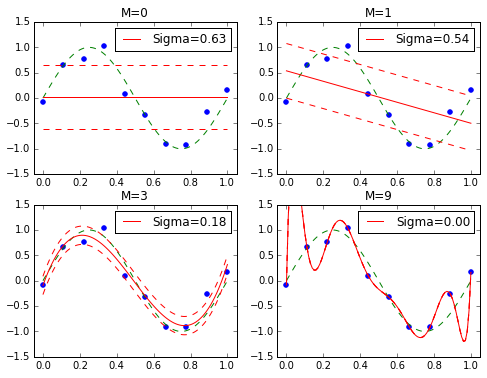

In [4]:
# 最尤推定で解を求める
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0, m + 1):
        p = dataset.x ** i
        p.name = "x**%d" % i
        phi = pd.concat([phi, p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)
    
    def f(x):
        y = 0.0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y
    
    sigma2 = 0.0
    for index, line in dataset.iterrows():
        sigma2 += (f(line.x) - line.y) ** 2
    sigma2 /= len(dataset)
    
    return (f, ws, np.sqrt(sigma2))

train_set = create_dataset(N)
test_set = create_dataset(N)
df_ws = DataFrame()

fig = plt.figure(figsize=(8, 6))

for c, m in enumerate(M):
    f, ws, sigma = resolve(train_set, m)
    df_ws = df_ws.append(Series(ws, name="M=%d" % m))
    
    subplot = fig.add_subplot(2, 2, c+1)
    subplot.set_xlim(-0.05, 1.05)
    subplot.set_ylim(-1.5, 1.5)
    subplot.set_title("M=%d" % m)
    
    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o', color='b')
    
    # 真の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = np.sin(2 * np.pi * linex)
    subplot.plot(linex, liney, color='g', linestyle='--')
    
    # 多項式近似の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = f(linex)
    label = "Sigma=%.2f" % sigma
    subplot.plot(linex, liney, color='r', label=label)
    subplot.plot(linex, liney + sigma, color='r', linestyle='--')
    subplot.plot(linex, liney - sigma, color='r', linestyle='--')    
    subplot.legend(loc=1)

#### オーバーフィッティングの検出

トレーニングセットとは別に用意しいたテストセットに対する予測の精度を確認する。最尤推定法では、対象となるデータが得られる確率、すなわち尤度関数(3.8)の値の変化をみる。ここでは事前に用意したトレーニングセットとテストセットを用いて、それぞれに対する対数尤度関数を計算する。これは尤度関数は値が大きく変動するので、グラフを見やすくするために対数で計算する。

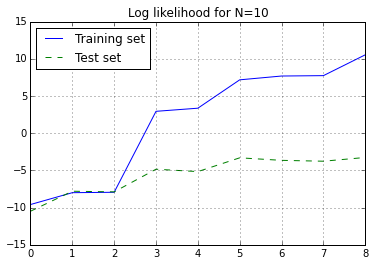

In [5]:
# 最大対数尤度(Maximum log likelihood)を計算
def log_likelihood(dataset, f):
    dev = 0.0
    n = float(len(dataset))
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        dev += (y - f(x)) ** 2
    err = dev * 0.5
    beta = n / dev
    lp = - beta * err + 0.5 * n * np.log(0.5 * beta / np.pi)
    return lp

df = DataFrame()
train_mlh = []
test_mlh = []

for m in range(min(M), max(M)):
    f, ws, sigma = resolve(train_set, m)
    train_mlh.append(log_likelihood(train_set, f))
    test_mlh.append(log_likelihood(test_set, f))
    
df = pd.concat([
    df,
    DataFrame(train_mlh, columns=['Training set']),
    DataFrame(test_mlh, columns=['Test set'])
], axis=1)

df.plot(title='Log likelihood for N=%d' % N, grid=True, style=['-', '--'])